## In this notebook we will build a classifier that predicts whether a sample is TCGA (cancerous) or GTEx (Healthy tissue)

In [1]:
import pandas as pd


In [2]:
#First we need to load our datasets TCGA and GTEx
df_tcga = pd.read_csv('../Data/data.csv')

df_gtex = pd.read_csv('../Data/df_gtex.csv')


In [3]:
df_tcga.head()


,Unnamed: 0,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.10,...,ENSG00000280314.1,ENSG00000280670.2,ENSG00000280789.1,ENSG00000280969.1,ENSG00000281106.2,ENSG00000281991.1,ENSG00000282419.1,ENSG00000282608.1,ENSG00000282757.1,ENSG00000282815.1
0,TCGA-AD-5900-01,10.670,0.000,10.38,9.036,8.496,8.563,10.050,11.44,10.860,...,0.0,6.704,10.920,0.0000,0.9745,9.797,0.0,7.375,0.0,0.0000
1,TCGA-BP-4968-01,11.580,5.298,10.51,9.421,7.842,10.280,12.410,12.69,10.940,...,0.0,7.174,11.350,0.0000,3.7550,9.462,0.0,9.454,0.0,0.8746
2,TCGA-NG-A4VU-01,9.693,3.262,11.00,9.155,9.683,7.383,8.848,11.19,9.806,...,0.0,6.339,10.810,0.0000,6.5250,4.545,0.0,7.105,0.0,0.0000
3,TCGA-CG-4305-01,10.260,0.000,11.10,9.465,9.078,9.173,12.320,12.09,12.220,...,0.0,6.743,9.858,0.9198,2.4490,8.339,0.0,8.972,0.0,0.0000
4,TCGA-AO-A03M-01,10.100,1.997,11.74,10.380,9.157,8.509,11.630,11.80,10.580,...,0.0,6.842,11.800,0.0000,1.4830,9.843,0.0,8.691,0.0,3.8250


In [4]:
df_tcga['cancer'] = 1


In [5]:
df_gtex.head()


,Unnamed: 0,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.10,...,ENSG00000280314.1,ENSG00000280670.2,ENSG00000280789.1,ENSG00000280969.1,ENSG00000281106.2,ENSG00000281991.1,ENSG00000282419.1,ENSG00000282608.1,ENSG00000282757.1,ENSG00000282815.1
0,GTEX-UTHO-1226-SM-3GAEE,9.124,0.000,9.375,8.514,7.637,10.110,15.720,10.170,8.951,...,0.0,5.260,9.723,0.0000,6.241,4.746,0.0,7.460,0.0,0.000
1,GTEX-146FH-1726-SM-5QGQ2,11.360,0.000,9.341,9.245,7.970,7.402,10.620,8.902,10.260,...,0.0,6.454,9.839,0.0000,2.861,8.651,0.0,5.521,0.0,0.000
2,GTEX-QDT8-0126-SM-48TZ1,8.926,6.679,9.009,9.016,7.294,9.091,12.820,9.356,9.262,...,0.0,4.563,9.641,0.0000,2.780,8.876,0.0,6.825,0.0,2.122
3,GTEX-QCQG-1326-SM-48U24,9.862,1.436,9.138,8.547,7.232,8.685,7.618,10.200,9.925,...,0.0,7.507,10.710,0.0000,2.614,7.030,0.0,5.300,0.0,0.000
4,GTEX-WZTO-2926-SM-3NM9I,8.429,2.591,9.153,8.497,6.185,7.117,9.470,8.746,9.765,...,0.0,7.627,10.450,0.7804,5.850,6.773,0.0,4.961,0.0,1.284


In [6]:
df_gtex['cancer'] = 0


In [7]:
df = pd.concat([df_tcga, df_gtex], axis = 0)


In [8]:
df.head()


,Unnamed: 0,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.10,...,ENSG00000280789.1,ENSG00000280969.1,ENSG00000281106.2,ENSG00000281991.1,ENSG00000282419.1,ENSG00000282608.1,ENSG00000282757.1,ENSG00000282815.1,cancer,ENSG00000187082.2
0,TCGA-AD-5900-01,10.670,0.000,10.38,9.036,8.496,8.563,10.050,11.44,10.860,...,10.920,0.0000,0.9745,9.797,0.0,7.375,0.0,0.0000,1,NaN
1,TCGA-BP-4968-01,11.580,5.298,10.51,9.421,7.842,10.280,12.410,12.69,10.940,...,11.350,0.0000,3.7550,9.462,0.0,9.454,0.0,0.8746,1,NaN
2,TCGA-NG-A4VU-01,9.693,3.262,11.00,9.155,9.683,7.383,8.848,11.19,9.806,...,10.810,0.0000,6.5250,4.545,0.0,7.105,0.0,0.0000,1,NaN
3,TCGA-CG-4305-01,10.260,0.000,11.10,9.465,9.078,9.173,12.320,12.09,12.220,...,9.858,0.9198,2.4490,8.339,0.0,8.972,0.0,0.0000,1,NaN
4,TCGA-AO-A03M-01,10.100,1.997,11.74,10.380,9.157,8.509,11.630,11.80,10.580,...,11.800,0.0000,1.4830,9.843,0.0,8.691,0.0,3.8250,1,NaN


In [9]:
df['Unnamed: 0'][df['ENSG00000187082.2'].isnull()]


0        TCGA-AD-5900-01
1        TCGA-BP-4968-01
2        TCGA-NG-A4VU-01
3        TCGA-CG-4305-01
4        TCGA-AO-A03M-01
              ...       
10525    TCGA-AB-2886-03
10526    TCGA-24-1464-01
10527    TCGA-BH-A18T-01
10528    TCGA-EE-A20B-06
10529    TCGA-FU-A3HZ-01
Name: Unnamed: 0, Length: 10530, dtype: object

#### What is interesting here is that gene ENSG00000187082.2 does not exist in the TCGA samples but it does exist on the GTEx samples
#### Let's check if there are others that exist in one and do not exist in another


In [10]:
cols_tcga = list(df_tcga.columns)
cols_gtex = list(df_gtex.columns)


In [11]:
present = {i for i in cols_gtex if any(j in i for j in cols_tcga)}
notPresent_in_tcga = set(cols_tcga) - present
notPresent_in_gtex = set(cols_gtex) - present

In [12]:
print(notPresent_in_gtex)

{'ENSG00000187082.2'}


In [13]:
print(notPresent_in_tcga)

{'ENSG00000186599.7', 'ENSG00000237957.5'}


In [14]:
#drop the genes that only exists in TCGA samples or GTEx samples
df = df.drop(columns =['ENSG00000187082.2', 'ENSG00000237957.5', 'ENSG00000186599.7'])


In [15]:
df.isnull().values.any()


False

In [16]:
df.head()


,Unnamed: 0,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.10,...,ENSG00000280670.2,ENSG00000280789.1,ENSG00000280969.1,ENSG00000281106.2,ENSG00000281991.1,ENSG00000282419.1,ENSG00000282608.1,ENSG00000282757.1,ENSG00000282815.1,cancer
0,TCGA-AD-5900-01,10.670,0.000,10.38,9.036,8.496,8.563,10.050,11.44,10.860,...,6.704,10.920,0.0000,0.9745,9.797,0.0,7.375,0.0,0.0000,1
1,TCGA-BP-4968-01,11.580,5.298,10.51,9.421,7.842,10.280,12.410,12.69,10.940,...,7.174,11.350,0.0000,3.7550,9.462,0.0,9.454,0.0,0.8746,1
2,TCGA-NG-A4VU-01,9.693,3.262,11.00,9.155,9.683,7.383,8.848,11.19,9.806,...,6.339,10.810,0.0000,6.5250,4.545,0.0,7.105,0.0,0.0000,1
3,TCGA-CG-4305-01,10.260,0.000,11.10,9.465,9.078,9.173,12.320,12.09,12.220,...,6.743,9.858,0.9198,2.4490,8.339,0.0,8.972,0.0,0.0000,1
4,TCGA-AO-A03M-01,10.100,1.997,11.74,10.380,9.157,8.509,11.630,11.80,10.580,...,6.842,11.800,0.0000,1.4830,9.843,0.0,8.691,0.0,3.8250,1


In [17]:
df = df.set_index('Unnamed: 0')


In [18]:
#randomize the samples
df = df.sample(frac = 1)


In [19]:
df.head()

,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.10,ENSG00000001167.14,...,ENSG00000280670.2,ENSG00000280789.1,ENSG00000280969.1,ENSG00000281106.2,ENSG00000281991.1,ENSG00000282419.1,ENSG00000282608.1,ENSG00000282757.1,ENSG00000282815.1,cancer
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
TCGA-J9-A8CP-01,11.310,2.7400,9.833,9.259,7.386,7.808,9.717,11.070,10.970,10.120,...,6.958,11.680,1.3910,1.391,7.040,0.0,5.611,0.0,1.391,1
GTEX-QVJO-0126-SM-3GIK4,7.386,4.9970,9.571,9.297,5.974,5.506,11.370,8.373,9.731,10.300,...,4.597,9.396,0.0000,4.997,6.255,0.0,2.765,0.0,0.000,0
TCGA-D5-5541-01,13.920,4.6100,12.640,10.080,9.672,9.408,10.910,12.550,12.480,11.660,...,7.165,11.270,0.9826,2.294,10.040,0.0,6.848,0.0,0.000,1
GTEX-NPJ8-0226-SM-48TBN,9.476,7.8110,9.237,8.659,7.081,10.150,12.400,10.180,9.321,9.717,...,6.306,9.198,0.0000,0.000,6.590,0.0,7.865,0.0,0.000,0
GTEX-X3Y1-0226-SM-3P5Z5,9.003,0.9002,9.693,8.340,6.271,8.670,13.950,10.360,9.317,8.703,...,7.278,9.677,1.4500,7.134,6.760,0.0,7.125,0.0,0.000,0


## We will use the Interquartile Range Method (IQR) to remove outliers in our dataset


In [20]:
import numpy as np
Q1 = np.percentile(df,25)
Q3 = np.percentile(df,75)
IQR = Q3 - Q1


In [21]:
df= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]



In [22]:
df.shape


(11512, 19036)

In [23]:
# let's keep a portion of the dataset as a test set for later evaluating our model

X= df[:9253].drop(columns = 'cancer')
test_df = df[9253:11512]


### As seen from the above shape of the dataframe, we do suffer from the curse of dimensionality as number of features is larger than the number of rows. We will approach the problem as follows.

First we will try to apply machine learning algorithms and see if indeed the curse exists, i.e. overfit

If that is the case we will either use dimensionality reduction (this is not optimal as we do need the genes for extracting knowledge) or we will build a classifier which uses regularized algorithms.

In [24]:
target = df['cancer'][:9253]


In [25]:
#Let's check for class imbalance
target.value_counts()


1    5218
0    4035
Name: cancer, dtype: int64

## 1) Apply dimensionality reduction i.e. PCA

In [26]:
X.shape


(9253, 19035)

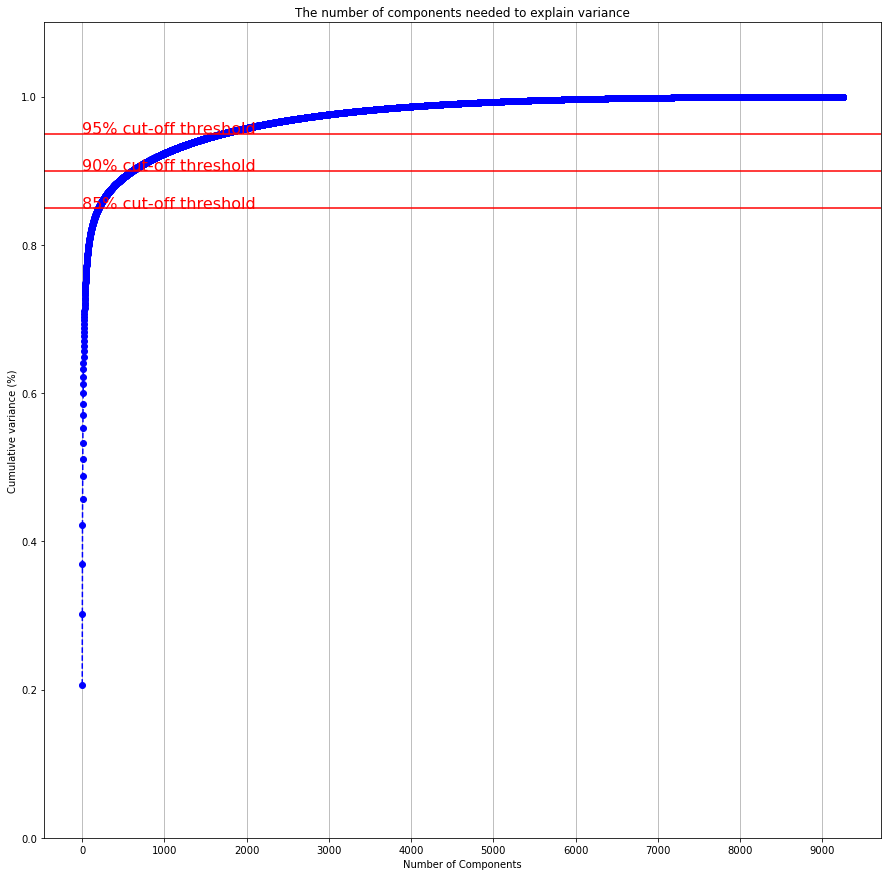

In [27]:
#We use the plot to see how many of the principal components we will keep
from sklearn.decomposition import PCA

import numpy as np
pca = PCA().fit(X)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)

fig, ax = plt.subplots()
xi = np.arange(1, 9254, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 10000, step=1000)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.95, '95% cut-off threshold', color = 'red', fontsize=16)

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.90, '90% cut-off threshold', color = 'red', fontsize=16)

plt.axhline(y=0.85, color='r', linestyle='-')
plt.text(0.1, 0.85, '85% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [27]:
# Transform the data

from sklearn.decomposition import PCA
pca_90= PCA(0.90)

'''fit PCA on dataset.'''
principalComponents_90 = pca_90.fit_transform(X)

'''print number of components'''
print("n.comps:", pca_90.n_components_)

principal90_df = pd.DataFrame(data = principalComponents_90)


n.comps: 632


In [28]:
principal90_df.head()


,0,1,2,3,4,5,6,7,8,9,...,622,623,624,625,626,627,628,629,630,631
0,-152.891825,23.158354,3.651054,35.722620,40.355807,-33.272051,-39.956415,68.682610,0.825897,-24.646846,...,0.716087,-0.239126,-0.721156,-0.019793,-0.549242,1.916185,-2.293204,-1.536848,-1.023012,-0.733347
1,128.281261,51.312390,-68.323048,40.659169,-22.972033,15.710248,1.223495,-3.886856,-5.751142,7.251003,...,3.832978,1.615303,-3.638458,-0.512131,0.688177,1.861963,-1.074210,0.827241,1.240805,-3.521680
2,36.472575,19.067129,-16.892236,-26.478988,77.987110,0.120131,-53.180791,63.243404,-5.620871,-54.375707,...,-1.141176,-0.882293,-0.459384,1.741236,0.111232,-2.451978,-1.364730,-1.563618,0.400124,1.557079
3,-96.011214,75.762384,76.459654,-62.266229,-73.759654,-2.523569,-10.357438,24.246551,13.196883,20.986146,...,-0.799729,0.977857,5.956639,-2.347966,1.267949,-1.810071,7.489745,-1.490993,1.225480,-0.715209
4,-83.026578,31.177572,11.347882,-59.927759,-85.968624,17.280908,-0.666244,36.846311,49.036459,4.439469,...,-2.141130,0.422306,-0.018937,-5.649397,2.381489,-0.702721,-0.701404,-0.129664,-0.199898,-1.021096


In [29]:
#train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(principal90_df, target, test_size = 0.2, random_state = 20)


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score, balanced_accuracy_score, recall_score
from sklearn.model_selection import cross_val_score


In [31]:
estimators = [
              LogisticRegression(),
              KNeighborsClassifier(),
              RandomForestClassifier(),
              GradientBoostingClassifier()
              ]

metrics = {}
for estimator in estimators:
    estimator.fit(X_train, y_train)
    predictions = estimator.predict(X_test)
    metrics[str(estimator).split('(')[0]] = {
        'balanced accuracy':round(balanced_accuracy_score(y_test, predictions),2),
        'macro f1':round(f1_score(y_test, predictions, average='macro'),2),
        'recall': (recall_score(y_test, predictions)),
        'cross validation score': (cross_val_score(estimator,X_train, y_train, cv = 5, scoring = 'recall'))
    }


/home/ubuntu/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/ubuntu/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

In [32]:
metrics_df = pd.DataFrame(metrics)


In [33]:
metrics_df


,LogisticRegression,KNeighborsClassifier,RandomForestClassifier,GradientBoostingClassifier
balanced accuracy,1.0,1.0,1.0,1.0
macro f1,1.0,1.0,1.0,1.0
recall,1.0,0.996198,1.0,0.996198
cross validation score,"[0.9987995198079231, 1.0, 1.0, 0.9987995198079...","[0.9987995198079231, 1.0, 0.9939975990396158, ...","[0.9987995198079231, 0.9988009592326139, 0.998...","[0.9951980792316927, 0.9976019184652278, 0.997..."


In [34]:
print('Logistic Regression: ',metrics_df['LogisticRegression'].iloc[3].mean(), '\n'
      'KNN: ',metrics_df['KNeighborsClassifier'].iloc[3].mean(),'\n'
      'Random Forest: ',metrics_df['RandomForestClassifier'].iloc[3].mean(),'\n'
      'Gradient Boosting: ',metrics_df['GradientBoostingClassifier'].iloc[3].mean())

Logistic Regression:  0.9995198079231692 
KNN:  0.9983193277310924 
Random Forest:  0.9987998076928613 
Gradient Boosting:  0.9961590391552304


### Let's apply the k neighbors 


In [35]:
from sklearn.metrics import confusion_matrix 

model = KNeighborsClassifier()
model.fit(X_train, y_train)

preds = model.predict(X_test)

cm = confusion_matrix(y_test, preds)


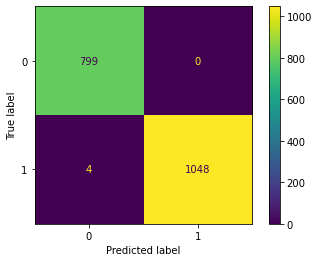

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay(confusion_matrix = cm).plot()

In [37]:
test_df.head()

,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.10,ENSG00000001167.14,...,ENSG00000280670.2,ENSG00000280789.1,ENSG00000280969.1,ENSG00000281106.2,ENSG00000281991.1,ENSG00000282419.1,ENSG00000282608.1,ENSG00000282757.1,ENSG00000282815.1,cancer
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
TCGA-F7-A624-01,10.220,0.000,10.700,8.089,9.313,9.365,10.440,12.470,9.172,9.488,...,6.652,11.240,0.7231,2.0890,7.553,0.0,7.626,0.0,0.0000,1
TCGA-X9-A973-01,11.930,4.955,10.920,9.667,9.687,9.338,14.870,12.990,10.830,10.440,...,7.141,10.750,0.0000,0.0000,8.444,0.0,10.620,0.0,0.0000,1
GTEX-YB5K-2026-SM-4VDT3,9.892,8.105,9.267,8.803,6.878,9.283,13.080,9.774,9.633,8.628,...,6.856,8.940,0.0000,2.5760,8.401,0.0,6.330,0.0,0.6965,0
GTEX-13OVI-2126-SM-5KM3U,8.941,3.798,8.936,8.798,6.644,7.883,9.519,9.625,10.800,8.715,...,5.111,9.760,0.0000,2.8130,6.278,0.0,6.945,0.0,0.8959,0
TCGA-35-3615-01,11.360,0.000,10.480,10.090,8.293,8.623,11.830,11.030,13.280,11.770,...,8.084,9.869,0.0000,0.7321,10.690,0.0,8.262,0.0,0.0000,1


### Let's apply our algorithm onto the test set we had kept from before

In [38]:
X_check = test_df.drop(columns = 'cancer')
y_true = test_df['cancer']


In [39]:
test_reduced = pca_90.transform(X_check)


In [40]:
predictions = model.predict(test_reduced)


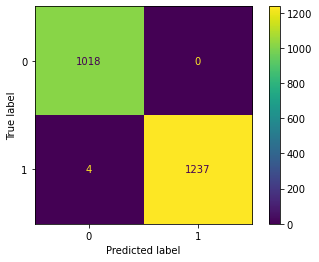

In [41]:
cm_test = confusion_matrix(y_true, predictions)

ConfusionMatrixDisplay(confusion_matrix = cm_test).plot()

### From the above confusion matrix we see that our model is great. Out of the 1241 tcga samples it has predicted correctly 1237 i.e. 99%. This makes us suspicious of the resulting algorithm. By looking at the literature the batch effect problem seems to be the reason for the above results. This refers to technical variation or non-biological differences between measurements of different groups of samples. In our case we have samples from two different studies which could lead two different type of measurements of the gene expressions hence leading two vastly different batches of samples which make incredibly easy for our algorithm to predict in which batch a sample belongs. In order to minimize batch effects we will use pycombat, an empirical Bayes method for batch correction on each gene

# Batch Effect Removal

In [42]:
import numpy as np

In [43]:
df_tcga['cancer'] = 1
df_gtex['cancer'] = 0

In [44]:
df = pd.concat([df_tcga, df_gtex], axis = 0)

In [45]:
# as before drop the genes that exist in one study and do not exist in the other
df = df.drop(columns =['ENSG00000187082.2', 'ENSG00000237957.5', 'ENSG00000186599.7'])

In [46]:
df = df.set_index('Unnamed: 0')

In [47]:
df.shape

(18305, 19036)

In [48]:
df = df.sample(frac = 1)

In [49]:
df = df[:14644]
test_df = df[14644:18305]

In [50]:
df.head()

,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.10,ENSG00000001167.14,...,ENSG00000280670.2,ENSG00000280789.1,ENSG00000280969.1,ENSG00000281106.2,ENSG00000281991.1,ENSG00000282419.1,ENSG00000282608.1,ENSG00000282757.1,ENSG00000282815.1,cancer
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
TCGA-A7-A0DB-01,10.970,4.533,9.477,11.660,10.110,7.152,11.150,9.922,11.59,11.22,...,6.134,9.483,0.0,4.349,0.000,0.0,9.027,0.0000,0.000,1
TCGA-CD-8527-01,9.637,0.000,11.720,9.327,9.217,8.097,9.811,13.160,11.36,11.20,...,6.727,11.140,0.0,0.000,11.290,0.0,7.017,0.0000,2.303,1
TCGA-FG-A4MU-01,12.140,4.104,10.510,9.278,8.969,8.989,10.030,11.430,10.82,10.29,...,8.913,11.270,0.0,3.338,7.358,0.0,10.970,0.0000,1.009,1
TCGA-AA-3697-11,12.540,4.419,10.930,9.890,9.038,9.639,11.740,12.310,10.89,10.28,...,6.493,10.640,0.0,0.000,9.717,0.0,7.167,0.0000,0.000,1
TCGA-E9-A1RD-11,11.350,9.714,9.867,9.645,7.817,9.417,14.400,11.290,11.44,10.13,...,6.491,9.311,0.0,1.016,6.458,0.0,7.606,0.5958,1.016,1


In [51]:
# Remove outliers
Q1 = np.percentile(df,25)
Q3 = np.percentile(df,75)
IQR = Q3 - Q1

df= df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [53]:
df['batch'] = np.random.randint(1,21, size = df.shape[0])

In [54]:
df['batch'].value_counts()

18    489
7     486
1     480
11    477
3     465
9     462
14    462
19    459
17    458
2     453
13    452
4     451
10    448
16    448
5     448
12    444
6     442
8     437
15    430
20    409
Name: batch, dtype: int64

In [55]:
from combat.pycombat import pycombat

# run pyComBat
X = pycombat(df.drop(columns = ['batch','cancer']).transpose(),df['batch']).transpose()

Found 20 batches.
Adjusting for 0 covariate(s) or covariate level(s).


/home/ubuntu/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


Standardizing Data across genes.
Fitting L/S model and finding priors.
Finding parametric adjustments.
Adjusting the Data


In [56]:
X.head()

,ENSG00000000003.14,ENSG00000000005.5,ENSG00000000419.12,ENSG00000000457.13,ENSG00000000460.16,ENSG00000000938.12,ENSG00000000971.15,ENSG00000001036.13,ENSG00000001084.10,ENSG00000001167.14,...,ENSG00000280314.1,ENSG00000280670.2,ENSG00000280789.1,ENSG00000280969.1,ENSG00000281106.2,ENSG00000281991.1,ENSG00000282419.1,ENSG00000282608.1,ENSG00000282757.1,ENSG00000282815.1
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
TCGA-A7-A0DB-01,10.891505,4.372460,9.452656,11.530401,10.013626,7.062059,11.152814,9.866647,11.529956,11.179215,...,-0.005944,6.092962,9.450706,-0.024643,4.209859,0.218980,-0.022150,9.041088,-0.006149,-0.056247
TCGA-FG-A4MU-01,12.288137,4.144852,10.585973,9.331900,9.040344,8.973286,10.046192,11.523336,10.841615,10.375118,...,0.003082,8.784717,11.308890,0.003850,3.161931,7.398888,-0.000051,10.545866,-0.006545,0.973316
TCGA-AA-3697-11,12.503283,4.444703,10.912629,9.901088,9.000669,9.631688,11.738227,12.289720,10.903902,10.278807,...,-0.002772,6.472527,10.642749,-0.016394,-0.058815,9.793856,0.007846,7.168594,-0.003358,-0.003956
TCGA-E9-A1RD-11,11.323375,9.813353,9.852496,9.649062,7.787511,9.410071,14.399019,11.275733,11.461827,10.126446,...,-0.002772,6.470553,9.281952,-0.016394,0.984126,6.316974,0.007846,7.598875,0.610049,1.011189
GTEX-S32W-1126-SM-4AD5V,7.905001,2.403925,9.000430,8.846801,7.012517,8.460868,11.584405,9.146160,10.643394,9.067664,...,-0.002926,6.492553,9.213747,-0.006796,1.461113,6.185357,-0.019406,5.898875,0.001846,1.467877


In [57]:
X.shape

(9100, 19035)

### From then on the procedure is similar to the above

In [58]:
target = df['cancer']

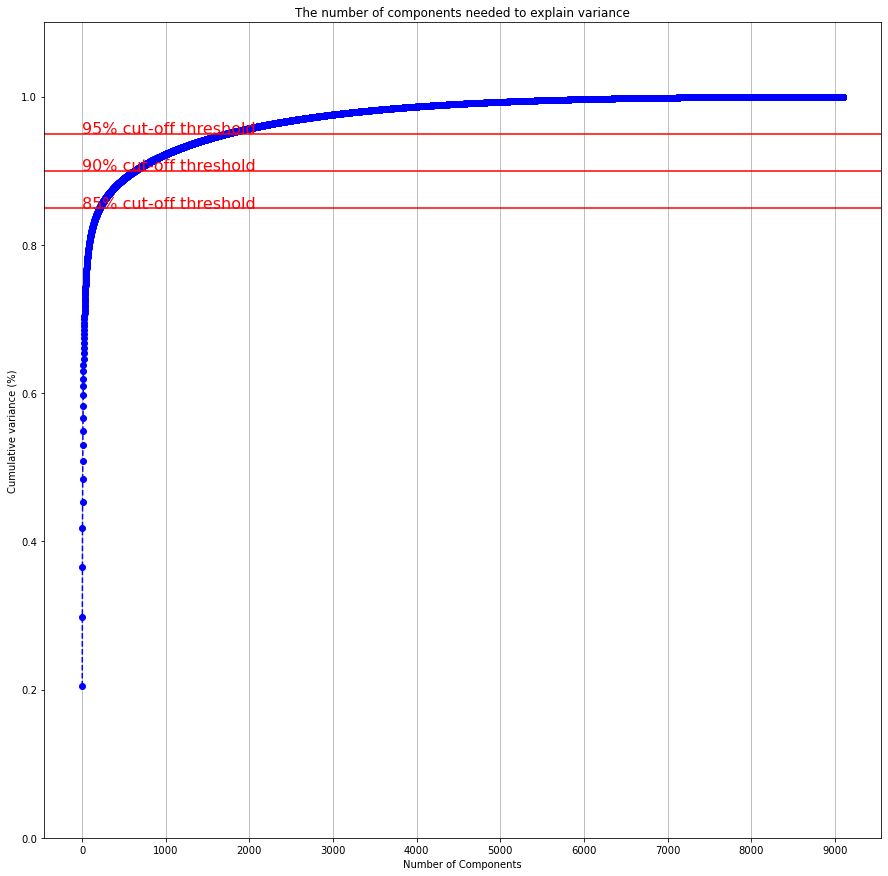

In [59]:
#We use the plot to see how many of the principal components we will keep
from sklearn.decomposition import PCA

import numpy as np
pca = PCA().fit(X)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,15)

fig, ax = plt.subplots()
xi = np.arange(1, 9101, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 10000, step=1000)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.95, '95% cut-off threshold', color = 'red', fontsize=16)

plt.axhline(y=0.90, color='r', linestyle='-')
plt.text(0.5, 0.90, '90% cut-off threshold', color = 'red', fontsize=16)

plt.axhline(y=0.85, color='r', linestyle='-')
plt.text(0.1, 0.85, '85% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [60]:
# Transform the data

from sklearn.decomposition import PCA
pca_90= PCA(0.90)

'''fit PCA on dataset.'''
principalComponents_90 = pca_90.fit_transform(X)

'''print number of components'''
print("n.comps:", pca_90.n_components_)

principal90_df = pd.DataFrame(data = principalComponents_90)

n.comps: 631


In [61]:
#train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(principal90_df, target, test_size = 0.2, random_state = 20)



In [62]:
model = KNeighborsClassifier()
model.fit(X_train,y_train)
preds = model.predict(X_test)
balanced_accuracy_score(y_test,preds)

0.9995206136145733

In [ ]:
estimators = [
              LogisticRegression(),
              KNeighborsClassifier(),
              RandomForestClassifier(),
              GradientBoostingClassifier()
              ]

metrics = {}
for estimator in estimators:
    estimator.fit(X_train, y_train)
    predictions = estimator.predict(X_test)
    metrics[str(estimator).split('(')[0]] = {
        'balanced accuracy':round(balanced_accuracy_score(y_test, predictions),2),
        'macro f1':round(f1_score(y_test, predictions, average='macro'),2),
        'recall': (recall_score(y_test, predictions)),
        'cross validation score': (cross_val_score(estimator,X_train, y_train, cv = 5, scoring = 'recall'))
    }



/home/ubuntu/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/home/ubuntu/anaconda3/envs/tf-gpu/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stabl

In [ ]:
metrics_df = pd.DataFrame(metrics)

In [ ]:
metrics_df


In [ ]:
print('Logistic Regression: ',metrics_df['LogisticRegression'].iloc[3].mean(), '\n'
      'KNN: ',metrics_df['KNeighborsClassifier'].iloc[3].mean(),'\n'
      'Random Forest: ',metrics_df['RandomForestClassifier'].iloc[3].mean(),'\n'
      'Gradient Boosting: ',metrics_df['GradientBoostingClassifier'].iloc[3].mean())

In [ ]:
## Let's use knn

from sklearn.metrics import confusion_matrix
model  = KNeighborsClassifier()
model.fit(X_train, y_train)

preds = model.predict(X_test)

cm = confusion_matrix(y_test, preds)


In [ ]:
ConfusionMatrixDisplay(confusion_matrix = cm).plot()

In [ ]:
#Check the algorithm on unseen data

X_check = test_df.drop(columns = 'cancer')
y_true = test_df['cancer']




In [ ]:
test_reduced = pca_90.transform(X_check)



In [ ]:
predictions = model.predict(test_reduced)



In [ ]:
cm_test = confusion_matrix(y_true, predictions)
ConfusionMatrixDisplay(confusion_matrix = cm_test).plot()

In [ ]:
print(balanced_accuracy_score(y_true, predictions))

### The pycombat tool for correcting batch effects does not work properly despite trying multiple batch numbers. This is probably due to the randomized assignment of the batches.  A more detailed and in-depth analysis of batch effect removal across samples, based on the type of sample and gene expression should be adopted in order to produce satisfactory results